In this notebook, I will show the thought process and how we came up with the question: "What is the week to week order count of the top 10 highest ordering shops? what apparent observations can be viewed from it that can help the business team?" and the answer to it

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
df = pd.read_csv('./anonymized/Orders-Grid view.csv')
df.head()

,Order ID,Order Date,Shop,Pick Up Emirate,Drop Off Emirate,Drop Off Area,Delivery Company,Status,COD,Delivery Cost,Charge to Customer,Category,Delivery Route,Month - Formula,Month
0,6713.0,1/2/2021,Shop001,Abu Dhabi,Dubai,NaN,DeliveryCompany01,Cancelled/Returned,NaN,NaN,NaN,SM,Abu Dhabi to Dubai,February,February
1,3015.0,1/9/2020,Shop002,Dubai,Fujeirah,Hamad bin abdulla road,DeliveryCompany01,Cancelled/Returned,NaN,AED 0.00,AED 0.00,NaN,Dubai to Fujeirah,September,September
2,3016.0,1/9/2020,Shop003,Abu Dhabi,Al Ain,Villa 8,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 45.00,NaN,Abu Dhabi to Al Ain,September,September
3,3024.0,1/9/2020,Shop004,Abu Dhabi,Ras Al Khaimah,Alkharan,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 60.00,NaN,Abu Dhabi to Ras Al Khaimah,September,September
4,3022.0,1/9/2020,Shop005,Sharjah,Abu Dhabi,NaN,DeliveryCompany02,Delivered,NaN,AED 30.00,AED 45.00,NaN,Sharjah to Abu Dhabi,September,September


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            4582 non-null   float64
 1   Order Date          5189 non-null   object 
 2   Shop                5189 non-null   object 
 3   Pick Up Emirate     5189 non-null   object 
 4   Drop Off Emirate    5179 non-null   object 
 5   Drop Off Area       4498 non-null   object 
 6   Delivery Company    5189 non-null   object 
 7   Status              5189 non-null   object 
 8   COD                 1475 non-null   object 
 9   Delivery Cost       4202 non-null   object 
 10  Charge to Customer  4278 non-null   object 
 11  Category            4523 non-null   object 
 12  Delivery Route      5189 non-null   object 
 13  Month - Formula     5189 non-null   object 
 14  Month               5189 non-null   object 
dtypes: float64(1), object(14)
memory usage: 608.2+ KB


In [4]:
#fixing the data type of Order Date
df['Order Date']= pd.to_datetime(df['Order Date'],format='%d/%m/%Y', errors='raise') 

# Most Transacting Customers



In [5]:
df['Shop'].value_counts(dropna=False)

Shop017    1401
Shop049     297
Shop011     212
Shop001     181
Shop016     178
           ... 
Shop128       1
Shop161       1
Shop166       1
Shop142       1
Shop171       1
Name: Shop, Length: 192, dtype: int64

In [6]:
#as a test let's see if rank changes by checking transactions for a random month

df[(df['Order Date'] >= '2021/01/01') & (df['Order Date'] <= '2021/01/31')]['Shop'].value_counts(dropna=False)

Shop017    414
Shop049    114
Shop011     58
Shop154     48
Shop029     28
          ... 
Shop098      1
Shop168      1
Shop147      1
Shop173      1
Shop166      1
Name: Shop, Length: 81, dtype: int64

#### Interesting, where is Shop016??? Lost Customer? should we try to reactivate? Let's plot her first across the months or weeks

<AxesSubplot:xlabel='Order Date'>

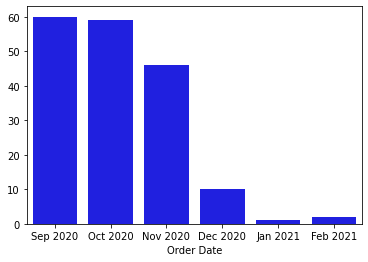

In [8]:
Rasha_Itani_month_counts = df[df['Shop'] == 'Shop016'].groupby(pd.Grouper(key='Order Date',freq='M'))['Shop'].value_counts()
Rasha_Itani_month_counts = Rasha_Itani_month_counts.unstack()

sns.barplot(x = Rasha_Itani_month_counts.index.strftime('%b %Y'), y = Rasha_Itani_month_counts.values[:,0] , color = "blue")


### We can see that Shop16 has decreasing number of orders ....

This gets us to a question that we might love to get an answer to:
From the highest 10 ordering shops, "What is the week to week order count of the top 10 highest ordering shops? what apparent observations can be viewed from it that can help the business team?"

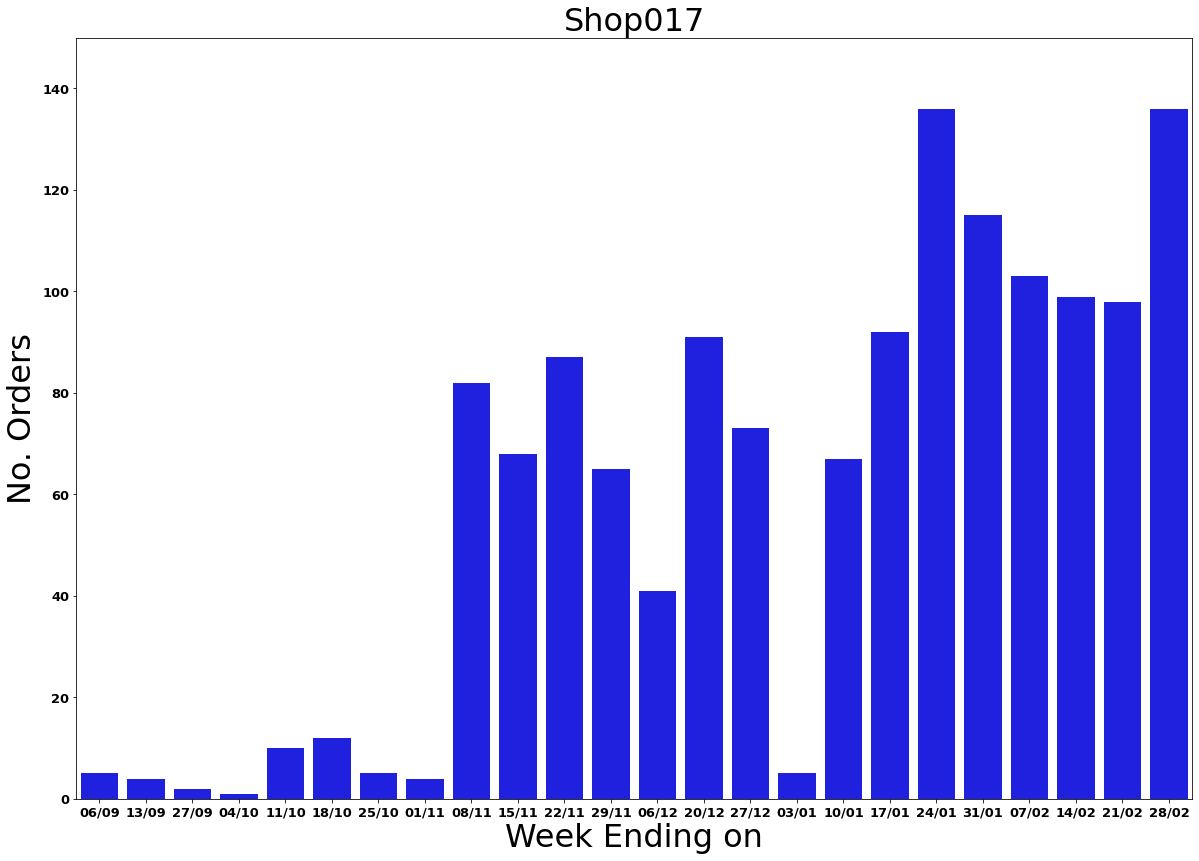

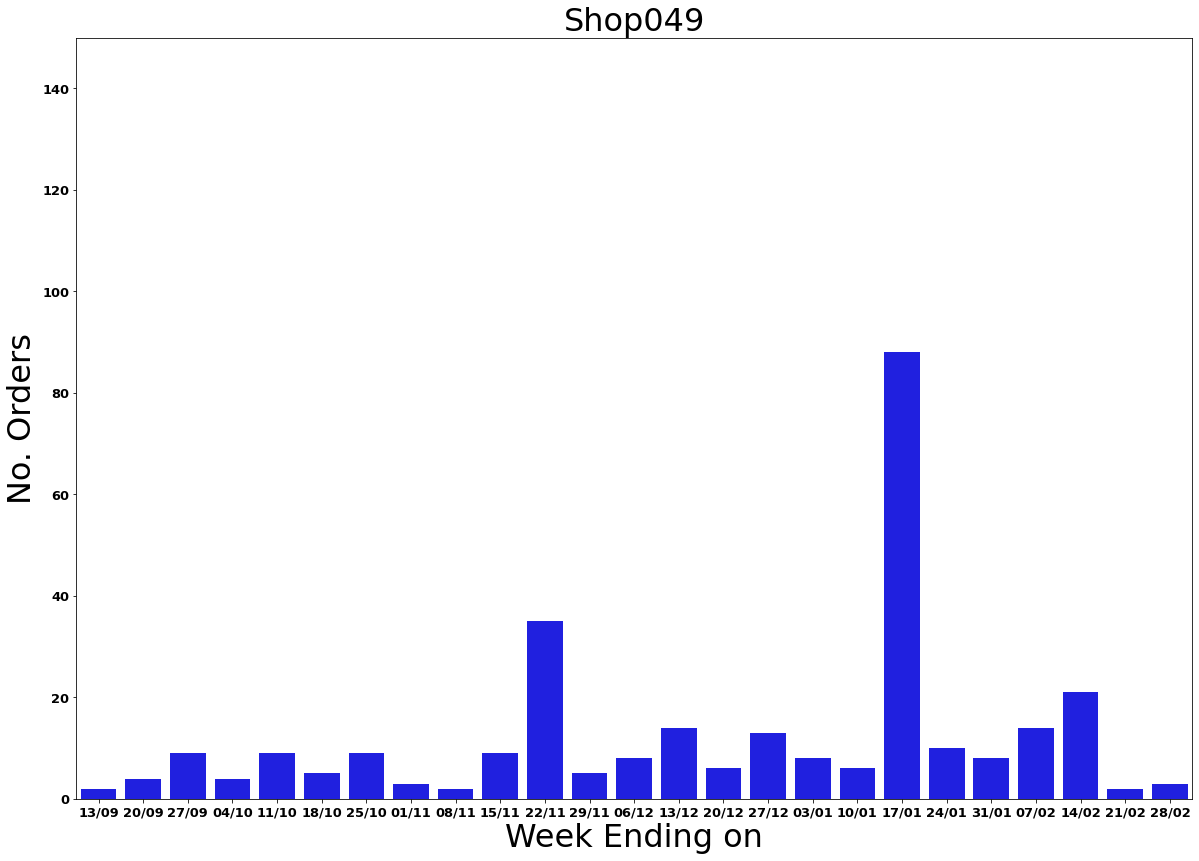

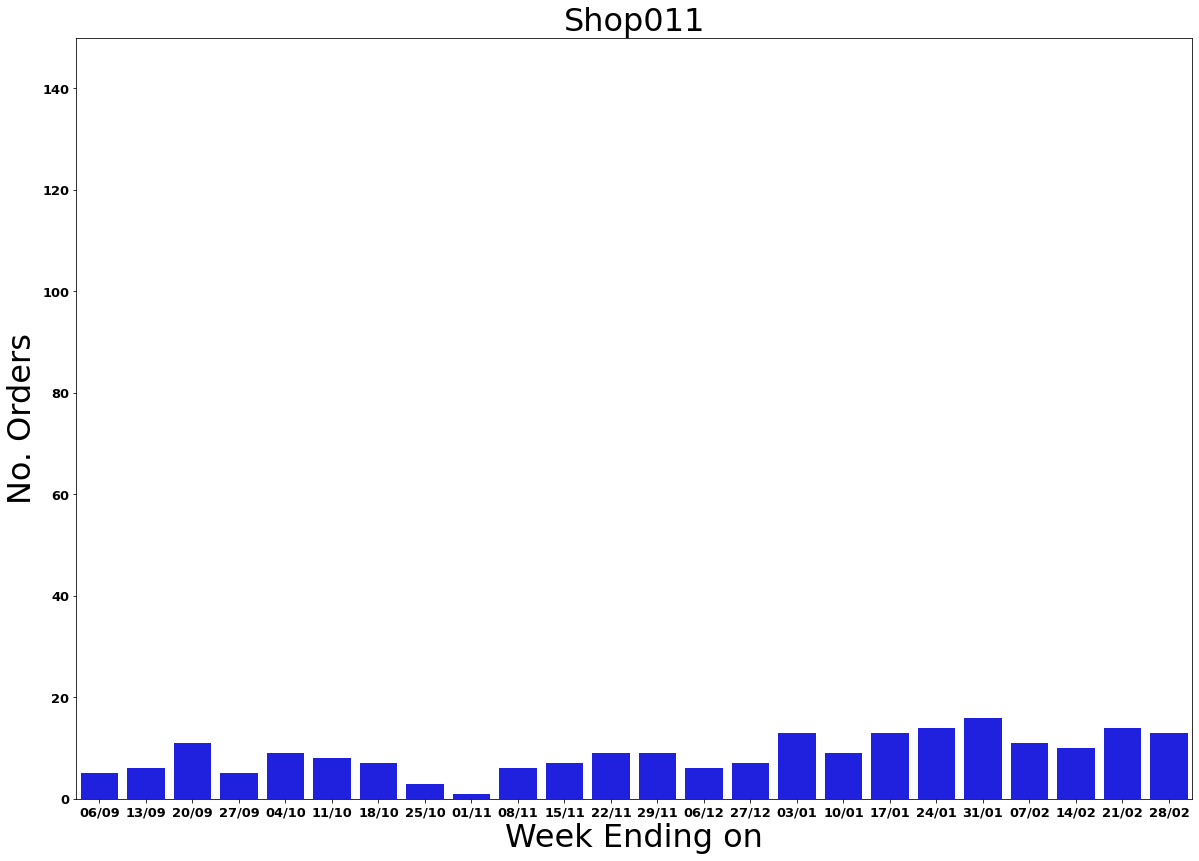

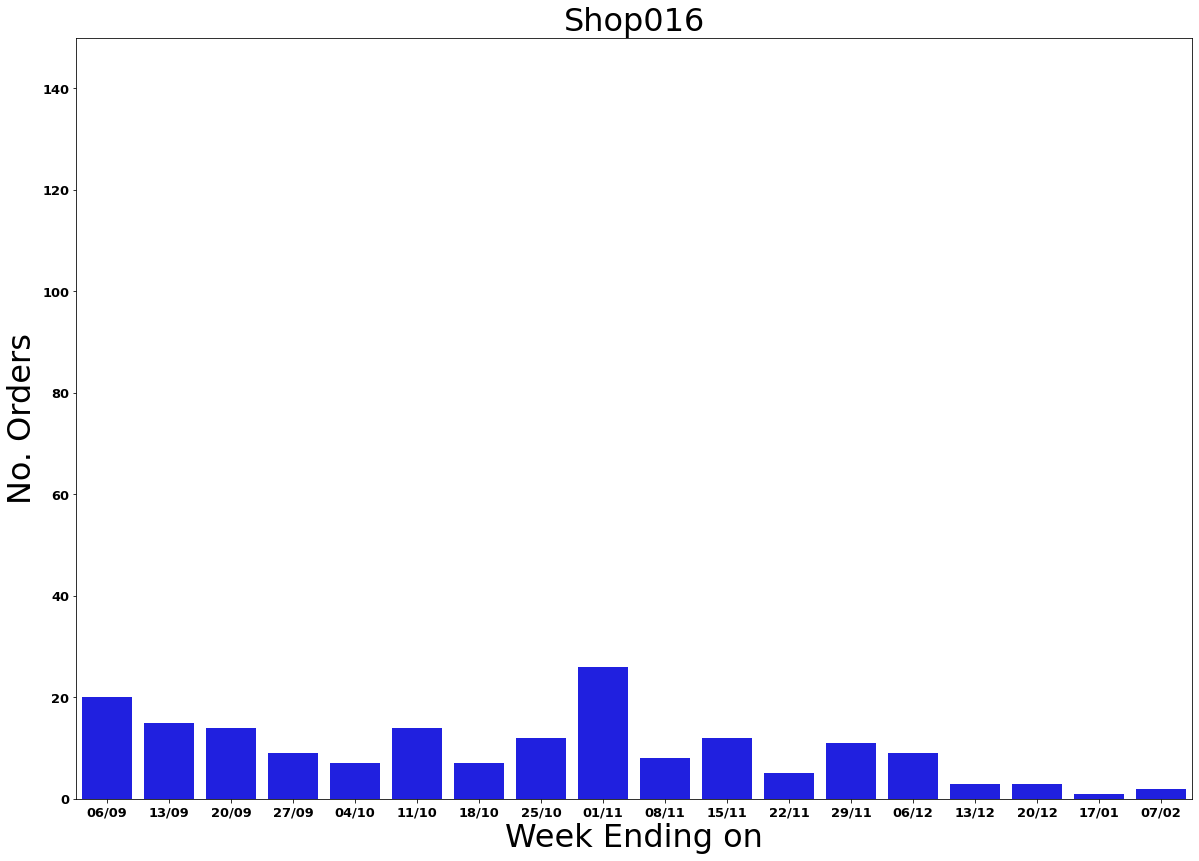

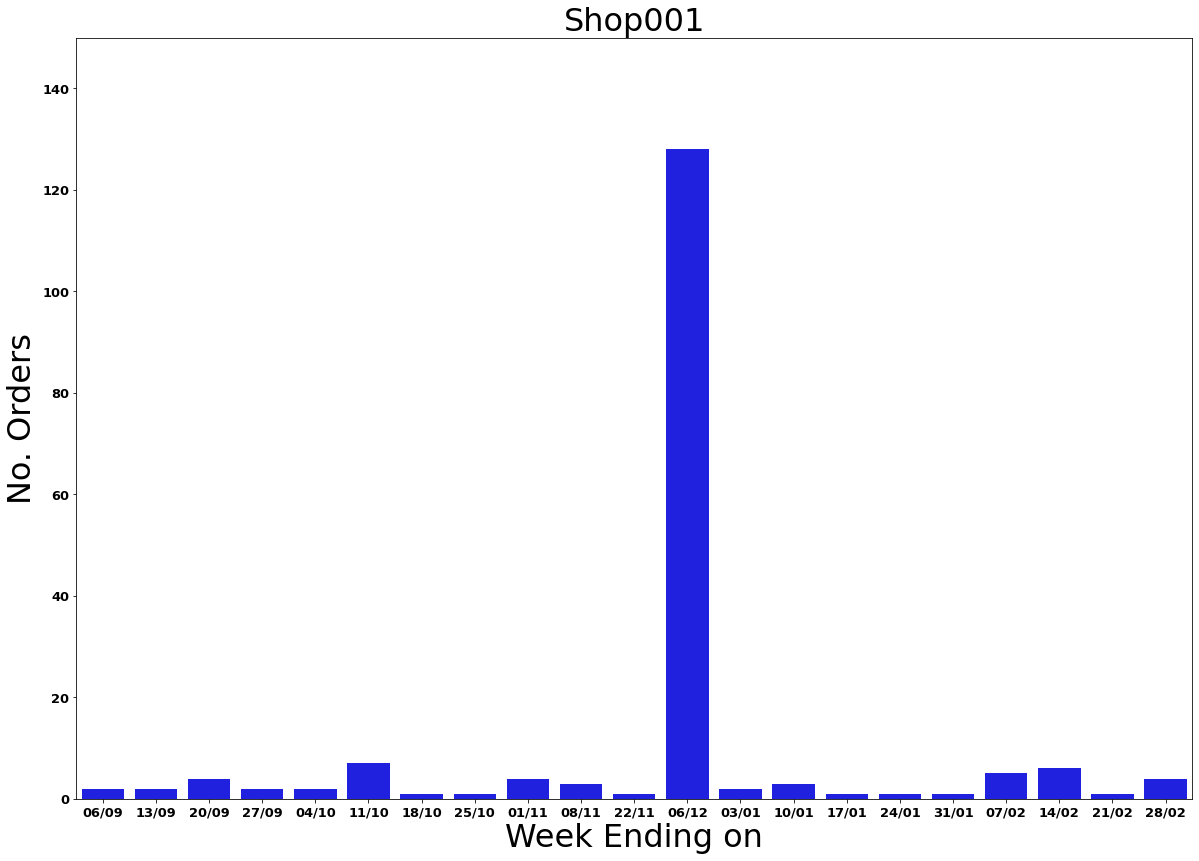

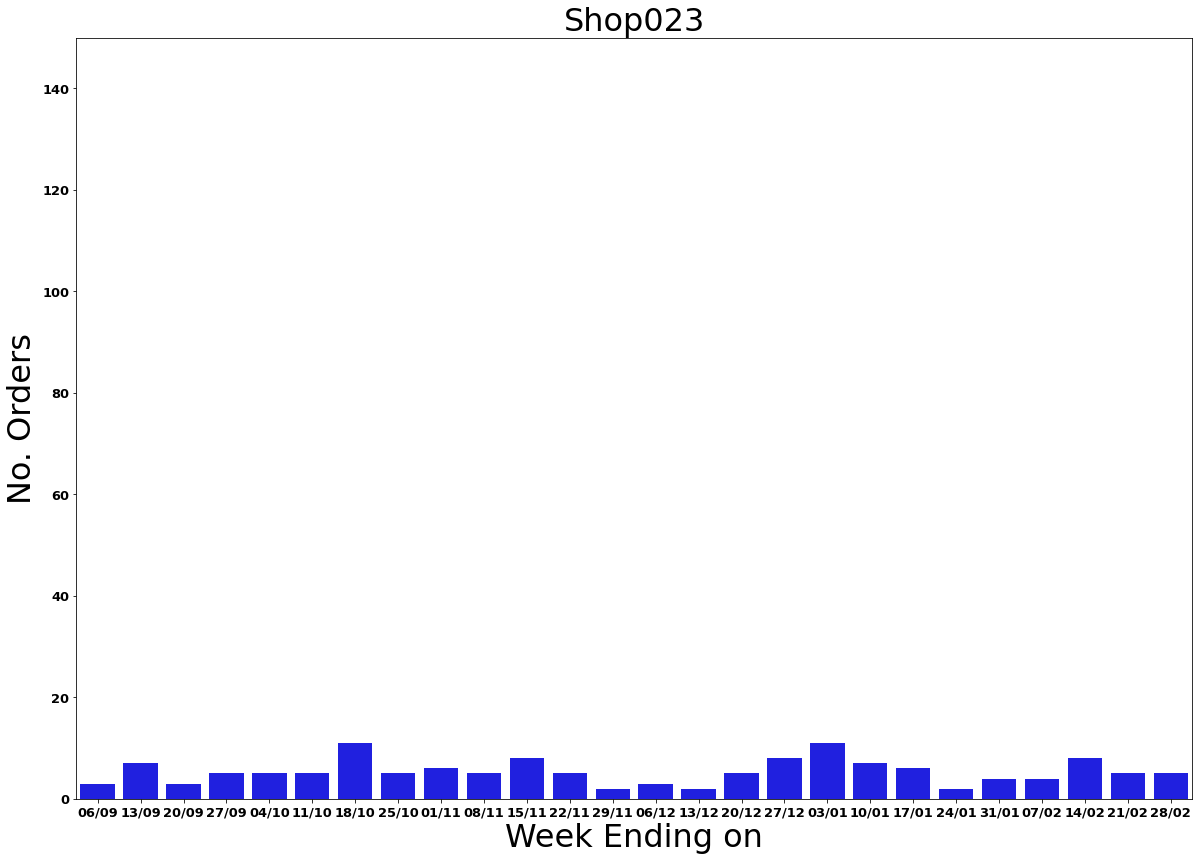

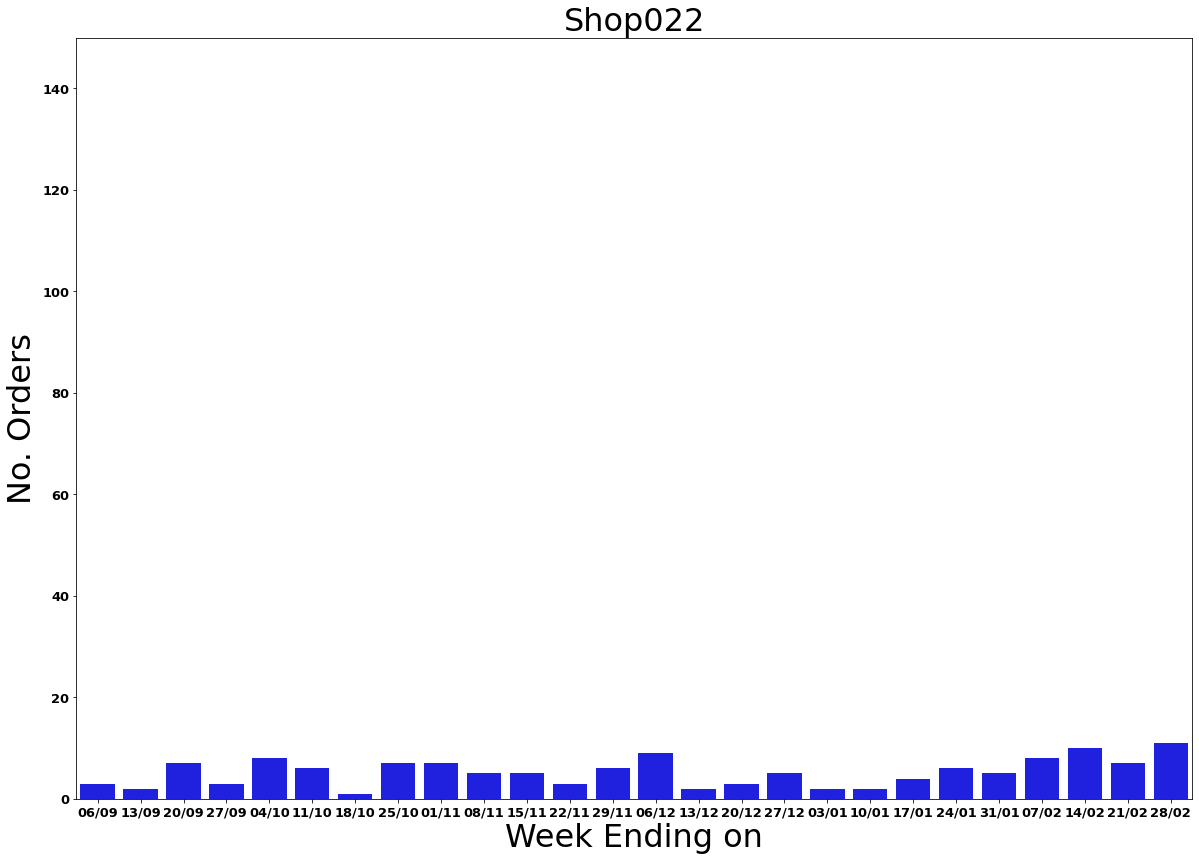

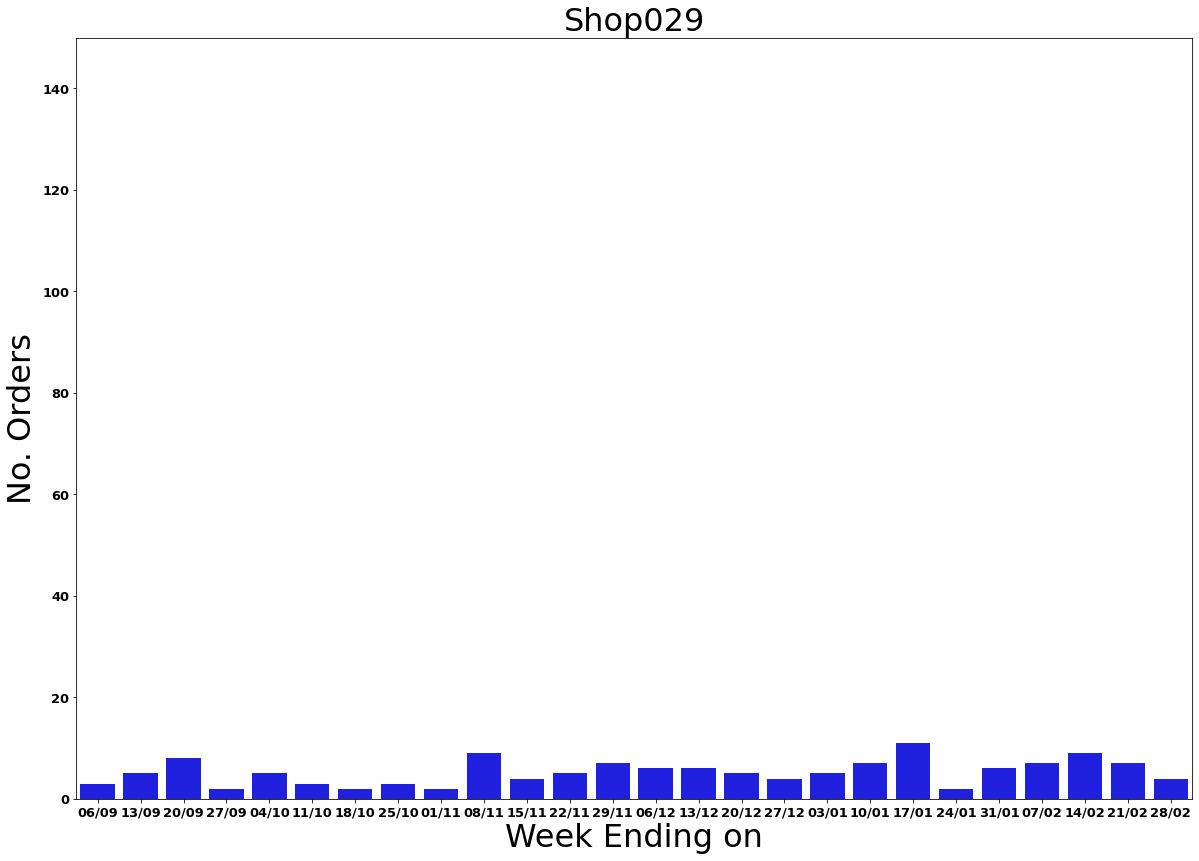

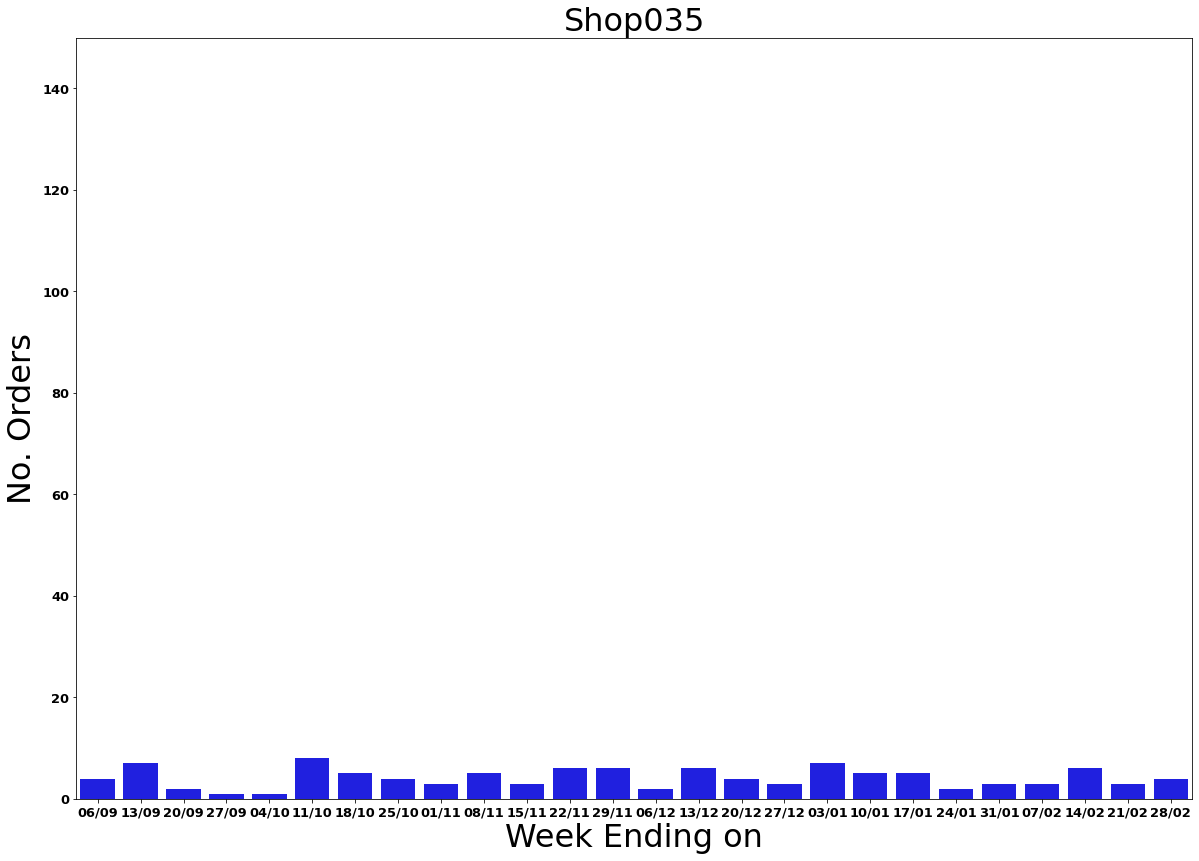

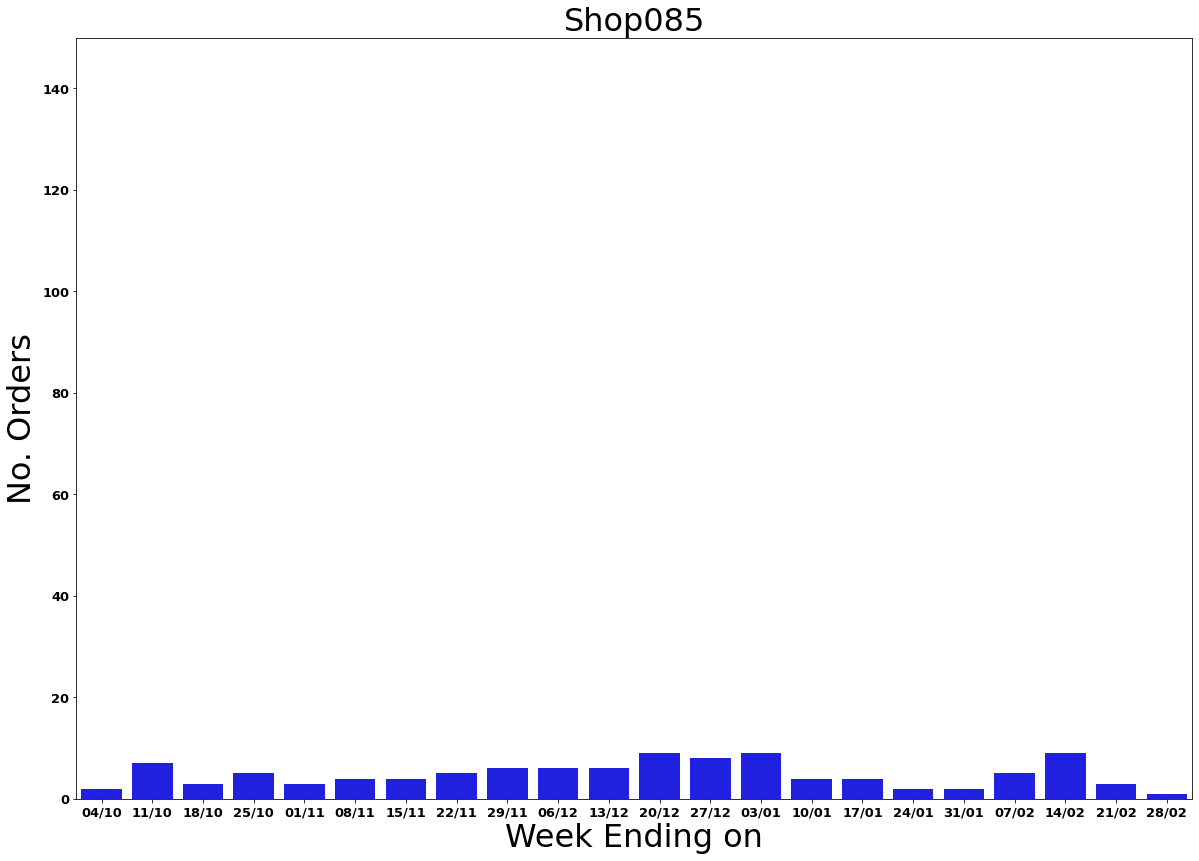

In [19]:

rc={'axes.labelsize': 32, 'font.size': 13, 'font.weight':'bold', 'legend.fontsize': 32.0, 'axes.titlesize': 32, "figure.figsize": (20, 14)}
sns.set_context(rc)


top_ordering_shops_names = df[df['Status'] == 'Delivered']['Shop'].value_counts(dropna=False).index[:10]

i = 0


for shop in top_ordering_shops_names:
    shop_weekly_counts = df[df['Shop'] == shop].groupby(pd.Grouper(key='Order Date',freq='W'))['Shop'].value_counts()
    shop_weekly_counts = shop_weekly_counts.unstack()
    
    
    plt.figure(i)
    i= i+1
    
    g1 = sns.barplot(x = shop_weekly_counts.index.strftime('%d/%m'), y = shop_weekly_counts.values[:,0] , color = "blue")
    g1.set_title(shop)
    g1.set(xlabel='Week Ending on', ylabel='No. Orders')
    g1.set(ylim=(0, 150))

After checking the weekly order frequency by top orderering shops. We can see the following that might be of interest to the business and operations team:
 - **Shop017** is the highest ordering shop with an increasing positive trend 
 - **Shop049** has some spikes, it might be worthy to understand why those spike happened and try to remake them
 - **Shop016** is one of the top 5 highest ordering shops, however, they have been declining in their weekly order rates, with no orders in the past 2 weeks of January. Maybe the business team can reactivate them
 - **Shop001** had a spike in the week of 06 Dec, maybe the business team can learn why was that spike and try to regenerate those spikes with this customer
 - **Shop011** seems to be increasing transacting orders with Wasla, maybe learn why is this success and try to replicate it.